# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

The design team of the company E-news Express has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1) Do the users spend more time on the new landing page than on the existing landing page?

2) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3) Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4) Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
#importing the important packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stats/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#viewing the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#viewing the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#checking the shape of the data
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns in the dataset.')

There are 100 rows and 6 columns in the dataset.


In [ ]:
#datatypes in different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**

As you can see there 100 rows with 6 columns with no null values. There are 4 object datatype columns and 2 numerical datatype columns. 

In [ ]:
##to get the statistical summary we can use the describe() function
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Observations***:



1.   There are 2 groups, each divided equally in 50.   
2.   The mean time spent on the page is 5.38 minutes and maximum is 10.71 minutes. 
3.   Out of 100, 54 seems to be converted.
4.   The landing page is in 3 unique languages of which Spanish seems to be the most preferred. 



In [ ]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
duplicates_table = df.duplicated().any() # True
duplicates_table

False

In [ ]:
duplicates_user = df['user_id'].duplicated().any() # True
duplicates_user

False

**Observations:**

There are no null values and duplicates. 

### Univariate Analysis

**Lets explore the distribution of various columns**

**User_id**

In [ ]:
#total unique count
df['user_id'].nunique()

100

**Group**

In [ ]:
#total count of each group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

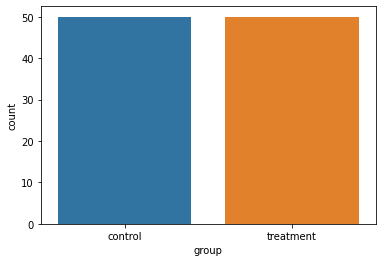

In [ ]:
sns.countplot(data=df,x='group');

**Landing Page**

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

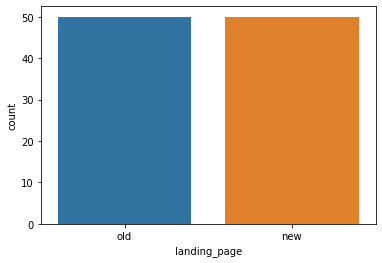

In [ ]:
sns.countplot(data=df,x='landing_page');

**Time Spent on the Page**

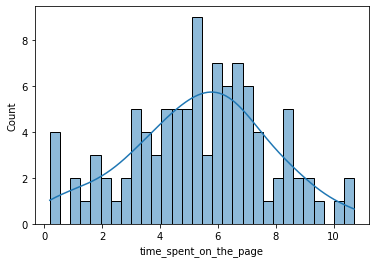

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page',bins=30, kde = True);

**Observations:**

The distribution is very normally distributed. 

**Converted**

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

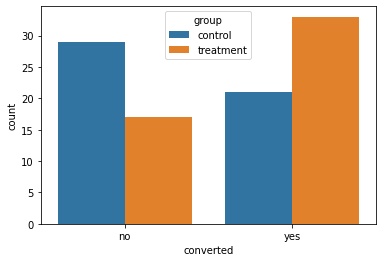

In [ ]:
sns.countplot(data=df,x='converted', hue='group');

**Observations:**

More users are converted (subscribed) after reading the new landing page, that is treatment group. 

**Language preferred**



In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

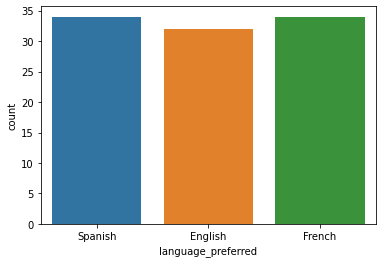

In [ ]:
sns.countplot(data=df,x='language_preferred');

### Bivariate Analysis

**Landing page and Time spent on the page**

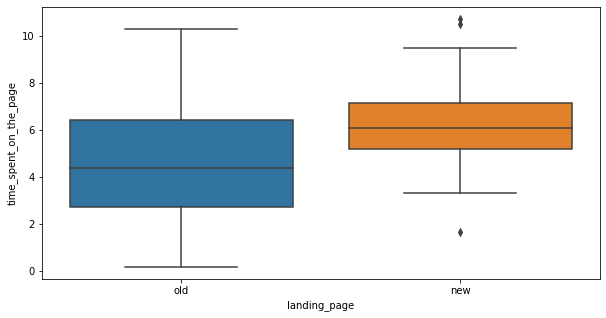

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

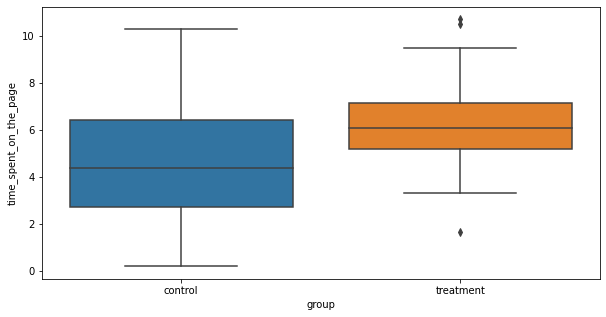

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='group',y='time_spent_on_the_page')
plt.show()

**Observations:**



1.   Mean value of time spent by the user on the new landing page is around 40% more than the mean time spent on the old landing page.     
2.   There are a few outliers for the new landing page showing that users have spent a maximum time of more than 10 minutes reading. 
3.   75% of the users reading new landing page has the reading time higher than the mean time of the old landing page. 





**Converted and Time spent on the page**

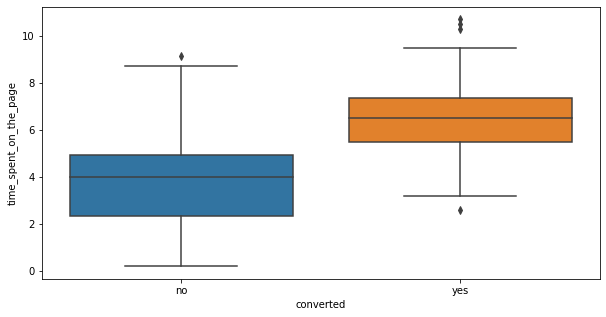

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

**Observations:**

It is clearly evident that users reading new landing page have higher reading time and also tend to subscribe. 

**Language preferred and Time spent on the page**


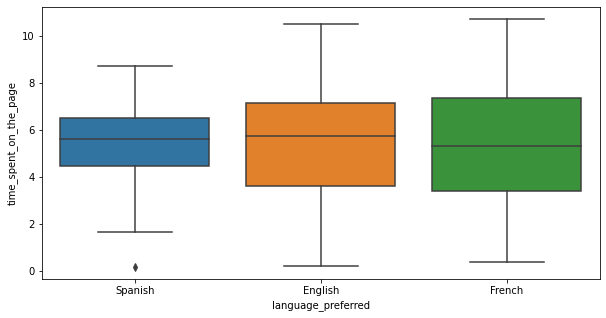

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show()

**Observations:**



1.   Mean time spent is almost similar for all the languages. 
2.   Spanish reading users spent the least time reading the page.



## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

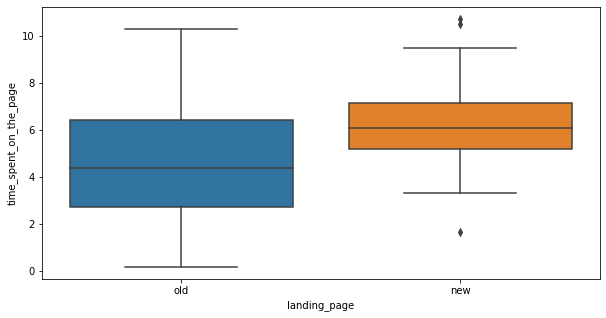

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page');

### Step 1: Define the null and alternate hypotheses

$H_0:\mu_1=\mu_2$

$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

Two independent sample T-test for equality of means - unknown standard deviations.

### Step 3: Decide the significance level

$\alpha = 0.05$

### Step 4: Collect and prepare data

In [ ]:
#creating sub-data for new landing page users and old landing page users.
time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
#calculating the mean for new landing page users
round(time_new.std(),2)

1.82

In [ ]:
#mean for old landing page users
round(time_old.std(),2)

2.58

### Step 5: Calculate the p-value

In [ ]:
#importing the appropriate test from the library
from scipy.stats import ttest_ind

In [ ]:
#calculating the p_value
test_stat, p_value = ttest_ind(time_new, time_old, equal_var = False, alternative = 'greater')
print(p_value)

0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#comparing the p_value with the level of significance
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since p_value is less than the level of significance, we can reject the null hypothesis. Hence, we have enough evidence to support the claim that users spend more time on the new landing page than the existing landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

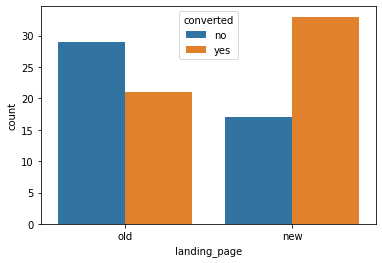

In [ ]:
#performing visual analysis
sns.countplot(data=df,x='landing_page', hue='converted');

**Defining null and alternative hypothesis**

$H_0:p_1 =p_2$

$H_a:p_1 > p_2$


**Selecting an appropriate test**

Two proportions Z-test for two populations proportions from two independent populations.  

**Level of significance**

$\alpha = 0.05$

**Preparing the data**

In [ ]:
#calculating the number of converted users in the treatment group and control group. 
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']


In [ ]:
#calculating total number of control and treatment group
total_control = df['group'].value_counts()['control']
total_treatment = df['group'].value_counts()['treatment']

**Importing test calculating p_value**

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [total_treatment, total_control], alternative ='larger')   

print('The p-value is', p_value)

The p-value is 0.008026308204056278


**Comparing p_value with level of significance**


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


**Inference**

Since p_value is less than the level of significance, we can reject the null hypothesis. Hence, we have enough evidence to support the claim that the conversion rate for the new page greater than the conversion rate for the old page.



## 3. Is the conversion and preferred language are independent or related?

**Visual analysis**

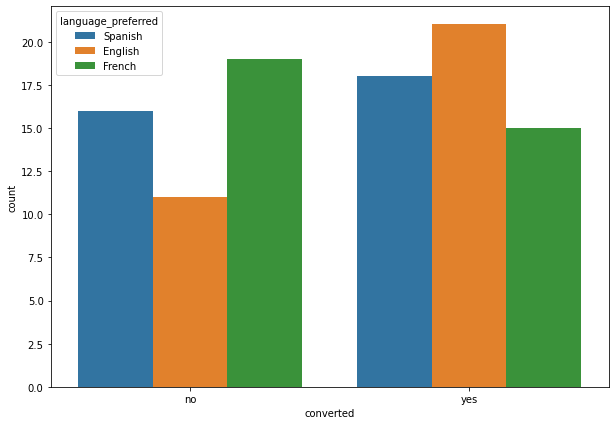

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='converted',hue='language_preferred');

**Defining Null and Alternative Hypothesis**

$H_0:$ Conversion is independent of preferred language.

$H_a:$ Conversion is dependent on preferred language.

**Selecting an appropriate test**

We can perform Chi-Square for Independence because we want to check the dependency of the two categorical variables.

**Level of Significance**

$\alpha = 0.05$

**Preparing contingency table**

In [ ]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


**Calculating the p_value**

In [ ]:
#importing the library and calculating p_value
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


**Compare p_value with level of significance**

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


**Inference**

Since p_value is higher than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough evidence to support the claim that the conversion is dependent on preferred language. 


## 4. Is the time spent on the new page same for the different language users?

**Performing visual analysis**

In [ ]:
#filtering all the new landing page
df_new_page = df[df['landing_page'] == 'new']
df_new_page.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


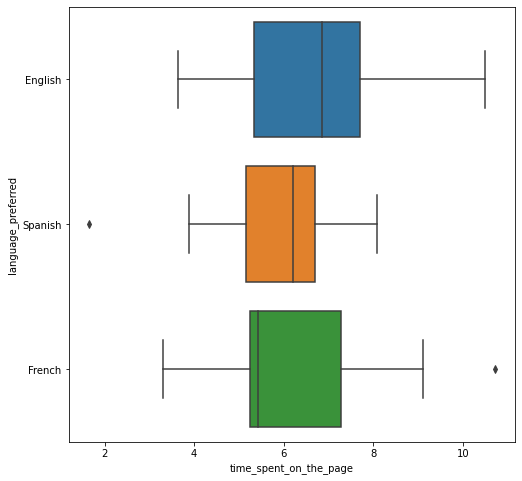

In [ ]:
#using df_new_page and creating a boxplot
plt.figure(figsize=(8,8))
sns.boxplot(data=df_new_page , x= 'time_spent_on_the_page', y = 'language_preferred');

In [ ]:
#mean time spent grouped by languages
df_new_page.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

**Observations:**

Not a significant difference in the mean time spent on a new page for different languages.

**Defining Null and Alternative Hypothesis**

$H_0: \mu_1 = \mu_2 = \mu_3$

$H_a: $ At least one time spent on the new page is different from the rest.

**Selecting an appropriate test**

Since there are three population means, we can perform one-way ANOVA F-test.

**Level of significance**

$\alpha = 0.05$

**Preparing data**

In [ ]:
#creating a subset of the time spent on the new page by English, French and Spanish language users 
time_spent_English = df_new_page[df_new_page['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new_page[df_new_page['language_preferred']=='French']['time_spent_on_the_page']   
time_spent_Spanish = df_new_page[df_new_page['language_preferred']=='Spanish']['time_spent_on_the_page']   

**Importing the library and calculating the p_value**

In [ ]:
#importing the library and calculating the p_value
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   

print('The p-value is', p_value)

The p-value is 0.43204138694325955


**Compare p_value with level of significance**

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


**Inference**

Since p_value is much higher than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough evidence to support the claim that the time spent on the new page is different for different language users.

## Conclusion and Business Recommendations

**Conclusion:**

1.   From the dataset we observe that users tend to spend more time on the new landing page than the existing old landing page.
2.   Users in the treatment group, having new landing page, tend to convert into   subscriber of E-news Express than users having old landing page. 
3.   We do not have enought evidence to show that language can be a barrier for the conversion of a user to a subcriber, though majority of the English reading customers tend to move towards subcription. 
4.   The mean time spent by the users on new landing page is almost similar for all languages.

**Business Recommendations:**

1.   E_news Express should try and reach out to a larger group of users and conduct a survey to get more details about the preferred language. (to add more languages to attract more users or remove some to make the application convenient and easy)
2.   They should also send out quarterly customer feedbacks so that the customers can comment on what changes should be made, or what columns to add or remove in the online portal. When customers feel like they have input on what you are providing, it can help build loyalty.
3.   Also, once in a while, a loyal customer over the years should be provided with some monetary benefits. 



In [ ]:
#converting .ipynb to .html
%%shell
jupyter nbconvert --to html //content/drive/MyDrive/Stats/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb

[NbConvertApp] Converting notebook //content/drive/MyDrive/Stats/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb to html
[NbConvertApp] Writing 496456 bytes to //content/drive/MyDrive/Stats/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.html


___